In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2016.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.533773
0    0.466227
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.562637
0    0.437363
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1366,SEA,34.462963,4.740741,8.925926,4.537037,4.618457,3.123457,7.950617,38.438272,0.252698,...,12.314815,14.179012,6.648148,0.006173,51.401235,1.308176,0.364780,0.017660,-0.043210,0
1367,OAK,33.950617,4.030864,8.345679,3.913580,3.778580,2.728395,7.067901,37.172840,0.239728,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
1368,CIN,33.870370,4.419753,8.660494,4.185185,4.202778,2.790123,7.925926,37.617284,0.250488,...,13.129630,14.141975,7.154321,0.006173,52.814815,1.456250,0.506250,0.056568,0.306173,1
1369,SDP,33.450617,4.234568,7.870370,4.037037,4.000432,2.771605,9.259259,37.043210,0.229815,...,12.358025,13.975309,6.709877,0.006173,50.462963,1.628931,0.572327,0.020198,-0.025309,1
1370,NYY,33.691358,4.197531,8.506173,3.993827,4.063457,2.932099,7.333333,37.401235,0.246086,...,11.037037,14.623457,5.901235,0.000000,44.777778,1.796296,0.537037,-0.052963,-0.850617,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,CLE,34.062112,4.826087,8.913043,4.552795,4.610807,3.298137,7.739130,38.229814,0.258199,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,1
1817,DET,34.322981,4.658385,9.167702,4.465839,4.594472,3.062112,8.093168,38.055901,0.262335,...,11.037037,14.623457,5.901235,0.000000,44.777778,1.796296,0.537037,-0.052963,-0.850617,0
1818,TBR,33.833333,4.148148,8.228395,3.993827,4.000864,2.771605,9.148148,37.320988,0.237667,...,12.759259,14.685185,6.975309,0.012346,48.746914,1.320755,0.452830,-0.057741,-0.144444,0
1819,ATL,34.248447,4.031056,8.720497,3.819876,3.707019,3.118012,7.701863,38.459627,0.250807,...,11.327160,13.641975,6.604938,0.000000,48.685185,1.425000,0.462500,-0.027525,-0.255556,0


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,PIT,34.209877,4.500000,8.802469,4.296296,4.191914,3.462963,8.234568,38.648148,0.252074,...,13.777778,13.111111,6.827160,0.006173,51.438272,1.440994,0.515528,-0.040438,-0.433333,1
1,KCR,34.271605,4.166667,8.950617,3.950617,3.969568,2.358025,7.555556,37.358025,0.256889,...,12.104938,13.851852,6.907407,0.000000,52.382716,1.493750,0.318750,0.035586,0.180864,1
2,TBR,33.833333,4.148148,8.228395,3.993827,4.000864,2.771605,9.148148,37.320988,0.237667,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
3,OAK,33.950617,4.030864,8.345679,3.913580,3.778580,2.728395,7.067901,37.172840,0.239728,...,11.833333,14.907407,7.006173,0.006173,51.216049,1.367089,0.360759,0.009222,0.217284,0
4,ARI,34.969136,4.641975,9.129630,4.376543,4.270370,2.858025,8.808642,38.641975,0.254932,...,13.969136,13.481481,7.308642,0.006173,47.030864,1.559006,0.552795,-0.033364,-0.499383,0


In [13]:
#for col in X_train.columns:
    #print(col)

In [14]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [15]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [16]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1366,SEA,34.462963,4.740741,8.925926,4.537037,4.618457,3.123457,7.950617,38.438272,0.252698,...,12.314815,14.179012,6.648148,0.006173,51.401235,1.308176,0.364780,0.017660,-0.043210,0
1367,OAK,33.950617,4.030864,8.345679,3.913580,3.778580,2.728395,7.067901,37.172840,0.239728,...,12.598765,13.808642,6.240741,0.006173,50.950617,1.543210,0.493827,0.008802,-0.098765,0
1368,CIN,33.870370,4.419753,8.660494,4.185185,4.202778,2.790123,7.925926,37.617284,0.250488,...,13.129630,14.141975,7.154321,0.006173,52.814815,1.456250,0.506250,0.056568,0.306173,1
1369,SDP,33.450617,4.234568,7.870370,4.037037,4.000432,2.771605,9.259259,37.043210,0.229815,...,12.358025,13.975309,6.709877,0.006173,50.462963,1.628931,0.572327,0.020198,-0.025309,1
1370,NYY,33.691358,4.197531,8.506173,3.993827,4.063457,2.932099,7.333333,37.401235,0.246086,...,11.037037,14.623457,5.901235,0.000000,44.777778,1.796296,0.537037,-0.052963,-0.850617,1


In [17]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [18]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [52]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [22]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [19]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

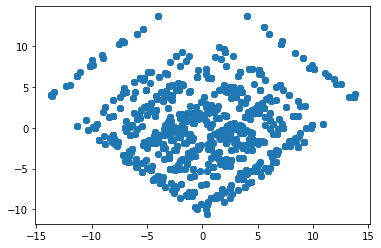

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [20]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [21]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.582658437452958
Train Mean Accuracy: 0.5886875343218012
Test Mean Accuracy: 0.567032967032967
Recall Score: 0.69921875
Precision Score: 0.5986622073578596
F1 Score: 0.6450450450450451


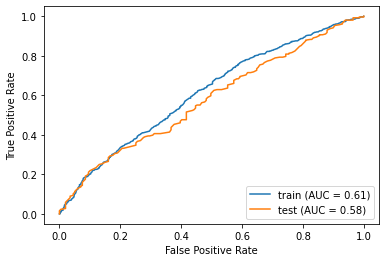

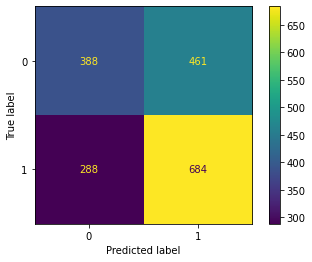

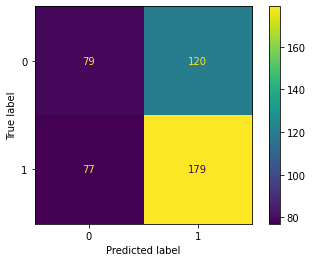

In [22]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [24]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

In [24]:
new_acc(probabilities)

(0.6521739130434783, 105)

### Home_win, zero imp
***

In [20]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [21]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.5837513171759747
Train Mean Accuracy: 0.5870400878638111
Test Mean Accuracy: 0.5626373626373626
Recall Score: 0.7265625
Precision Score: 0.5904761904761905
F1 Score: 0.6514886164623468


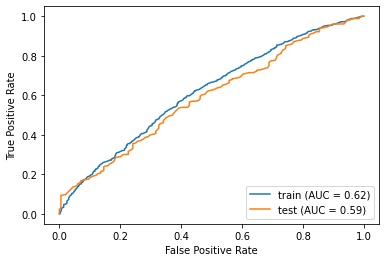

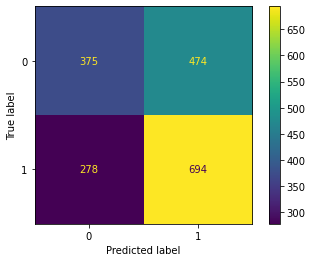

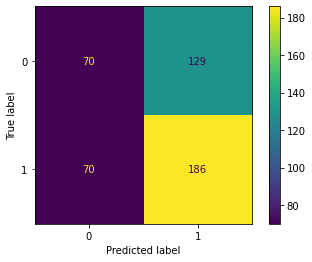

In [22]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [25]:
new_acc(probabilities)

(0.6530612244897959, 96)

### Explore thresehold movement and other things

In [94]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
logregs.predict_proba(X_test_scaled)[:,1] >= 0.6

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False])

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

### Home win KNN

Number of Neighbors: 17
Metric: minkowski
Weights: uniform
Mean Cross-Val Score: 0.5310176125244619
Train Mean Accuracy: 0.6161449752883031
Test Mean Accuracy: 0.6175824175824176
Recall Score: 0.78125
Precision Score: 0.6289308176100629
F1 score: 0.6968641114982579


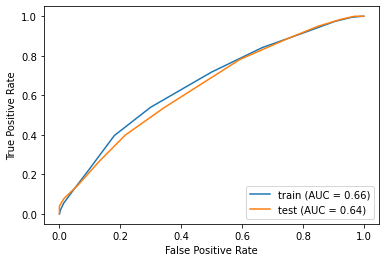

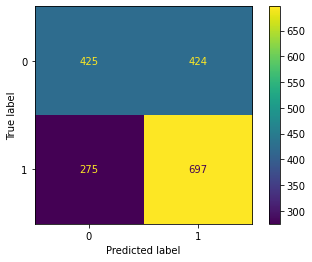

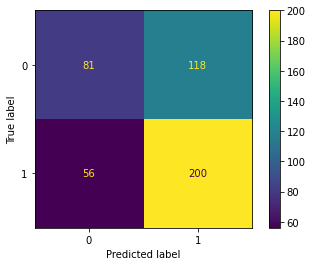

In [25]:
prediction,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [26]:
new_acc(probabilities)

(0.7021276595744681, 132)

### KNN zero imp

Number of Neighbors: 17
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.5370615685684179
Train Mean Accuracy: 0.6095551894563427
Test Mean Accuracy: 0.610989010989011
Recall Score: 0.7421875
Precision Score: 0.6312292358803987
F1 score: 0.6822262118491922


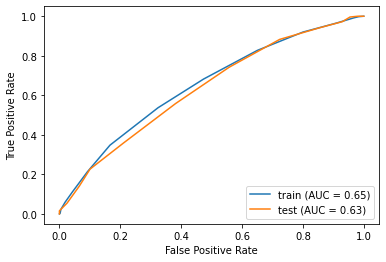

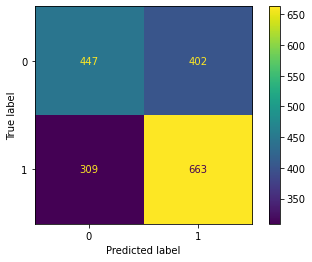

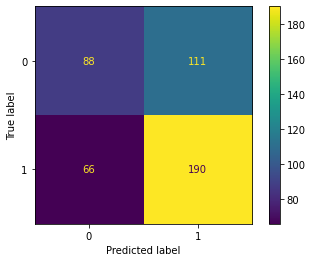

In [26]:
prediction,probabilities=knn(zero_imp_train,zero_imp_test,y_train,y_test)

In [28]:
new_acc(probabilities)

(0.6797752808988764, 121)

# Decision Tree

In [24]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.5784319714903907
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


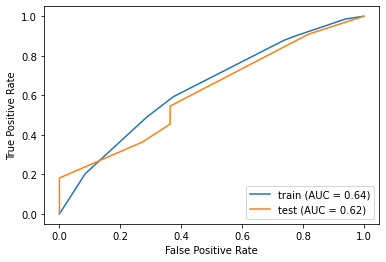

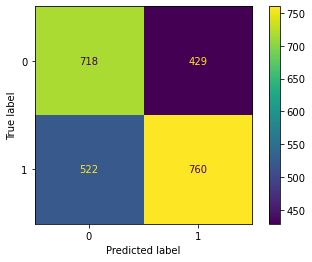

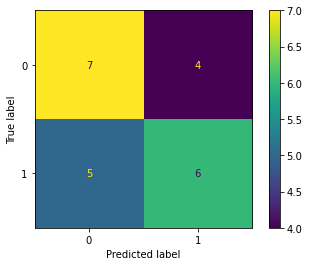

In [25]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [27]:
new_acc(probabilities)

0.5833333333333334

# Random Forest

### Model

In [27]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    y_prob = rforest.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);
    
    return y_pred,y_prob


### All feats RF

In [27]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 150
criterion: entropy
Mean Cross-Val Score: 0.4958843895830197
Train Mean Accuracy: 0.7171883580450302
Test Mean Accuracy: 0.7032967032967034
Recall Score: 0.734375
Precision Score: 0.7372549019607844
F1 score: 0.7358121330724071


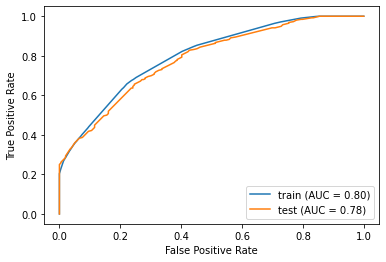

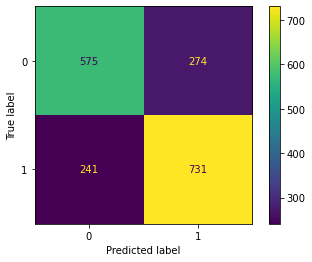

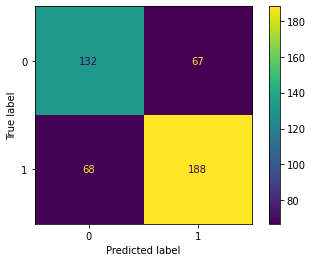

In [28]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [29]:
new_acc(probabilities)

(0.7548209366391184, 274)

### Random Forest zero imp

In [29]:
rfeats= feature_select(zero_imp_train,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = zero_imp_train[rfeats]
X_test_best_for = zero_imp_test[rfeats]

Number of Trees: 90
criterion: gini
Mean Cross-Val Score: 0.5079662802950474
Train Mean Accuracy: 0.7171883580450302
Test Mean Accuracy: 0.7076923076923077
Recall Score: 0.75390625
Precision Score: 0.7338403041825095
F1 score: 0.74373795761079


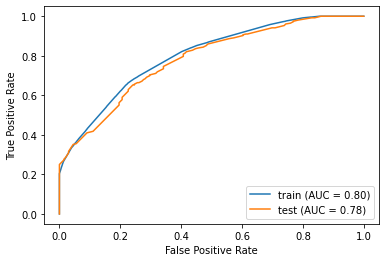

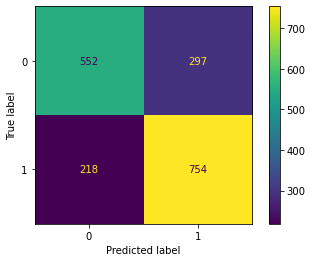

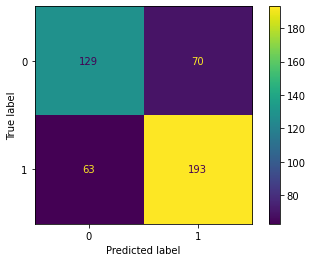

In [30]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [31]:
new_acc(probabilities)

(0.7584269662921348, 270)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


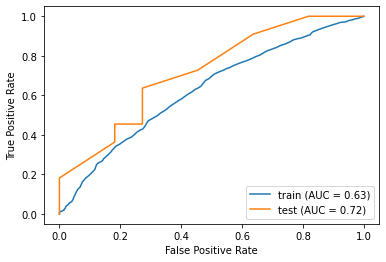

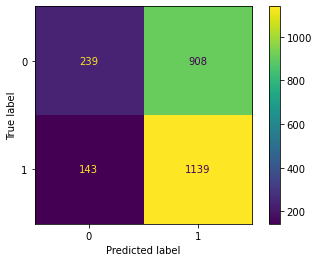

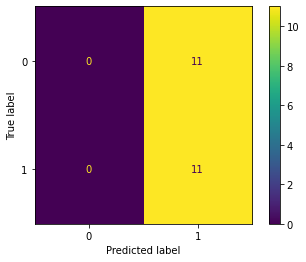

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


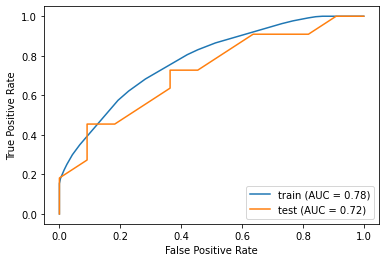

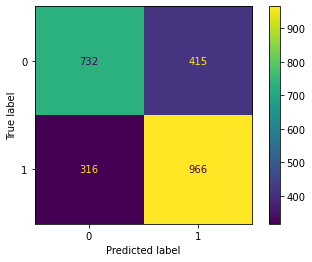

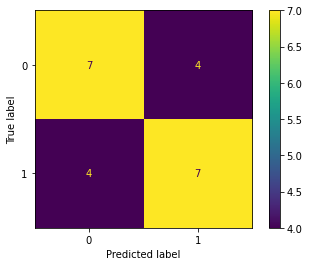

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)